In [1]:
!pip install tensorflow==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [2]:
!unzip pcparts

Archive:  pcparts.zip
   creating: pc_parts/case/
  inflating: pc_parts/case/1.jpg     
  inflating: pc_parts/case/10.jpg    
  inflating: pc_parts/case/100.jpg   
  inflating: pc_parts/case/101.jpg   
  inflating: pc_parts/case/102.jpg   
  inflating: pc_parts/case/103.jpg   
  inflating: pc_parts/case/104.jpg   
  inflating: pc_parts/case/105.jpg   
  inflating: pc_parts/case/106.jpg   
  inflating: pc_parts/case/107.jpg   
  inflating: pc_parts/case/108.jpg   
  inflating: pc_parts/case/109.jpg   
  inflating: pc_parts/case/11.jpg    
  inflating: pc_parts/case/110.jpg   
  inflating: pc_parts/case/111.jpg   
  inflating: pc_parts/case/112.jpg   
  inflating: pc_parts/case/113.jpg   
  inflating: pc_parts/case/114.jpg   
  inflating: pc_parts/case/115.jpg   
  inflating: pc_parts/case/116.jpg   
  inflating: pc_parts/case/117.jpg   
  inflating: pc_parts/case/118.jpg   
  inflating: pc_parts/case/119.jpg   
  inflating: pc_parts/case/12.jpg    
  inflating: pc_parts/case/120.jpg   


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil, random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
import numpy as np

In [4]:
img_path = '/content/pc_parts'

In [5]:
train_dir = os.path.join(img_path, 'train')
val_dir = os.path.join(img_path, 'val')

for class_name in os.listdir(img_path):
    if class_name not in ["train", "validation"]:  # Lewati folder train dan validation
        class_path = os.path.join(img_path, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)  # Acak urutan gambar

        # Bagi data menjadi train dan validation (80% train, 20% validation)
        split_index = int(0.8 * len(images))
        train_images = images[:split_index]
        val_images = images[split_index:]

        # Pindahkan gambar ke folder train
        for image in train_images:
            src_path = os.path.join(class_path, image)
            dst_path = os.path.join(train_dir, class_name, image)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)  # Buat folder jika belum ada
            shutil.move(src_path, dst_path)

        # Pindahkan gambar ke folder validation
        for image in val_images:
            src_path = os.path.join(class_path, image)
            dst_path = os.path.join(val_dir, class_name, image)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)  # Buat folder jika belum ada
            shutil.move(src_path, dst_path)

print("Data telah dibagi dan dipindahkan ke folder train dan validation.")

Data telah dibagi dan dipindahkan ke folder train dan validation.


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    channel_shift_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42,
)


Found 576 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [8]:
num_classes = 6
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
hasil = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    # callbacks=[early_stopping_callback]
)

Epoch 1/50
18/18 [==============================] - 60s 3s/step - loss: 2.8027 - accuracy: 0.1944 - val_loss: 1.8004 - val_accuracy: 0.1458
Epoch 2/50
18/18 [==============================] - 46s 3s/step - loss: 2.4201 - accuracy: 0.2049 - val_loss: 1.8032 - val_accuracy: 0.1875
Epoch 3/50
18/18 [==============================] - 46s 3s/step - loss: 2.1932 - accuracy: 0.2431 - val_loss: 1.8716 - val_accuracy: 0.1667
Epoch 4/50
18/18 [==============================] - 46s 3s/step - loss: 2.1514 - accuracy: 0.2326 - val_loss: 1.8990 - val_accuracy: 0.1736
Epoch 5/50
18/18 [==============================] - 47s 3s/step - loss: 2.0467 - accuracy: 0.2743 - val_loss: 2.1006 - val_accuracy: 0.1736
Epoch 6/50
18/18 [==============================] - 46s 3s/step - loss: 2.0129 - accuracy: 0.2552 - val_loss: 2.0355 - val_accuracy: 0.1667
Epoch 7/50
18/18 [==============================] - 47s 3s/step - loss: 1.8842 - accuracy: 0.2760 - val_loss: 2.2068 - val_accuracy: 0.1667
Epoch 8/50
18/18 [==

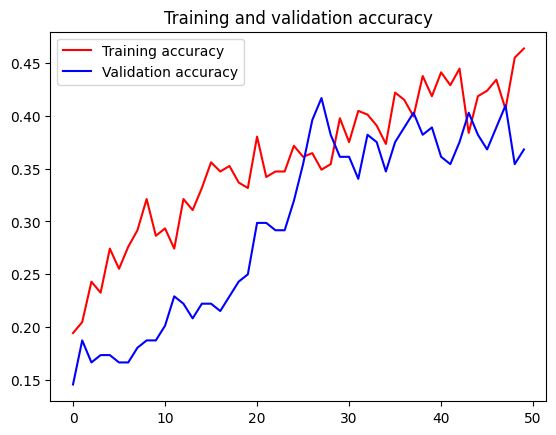

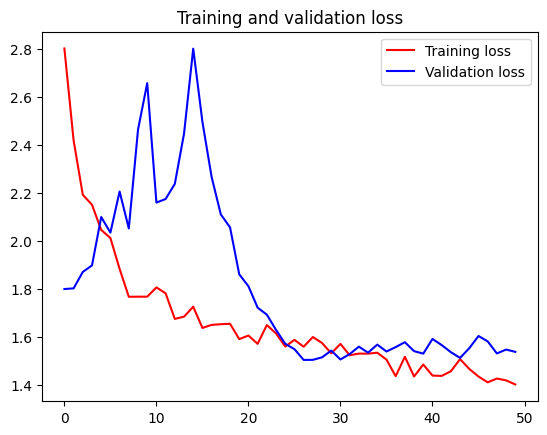

In [11]:
# prompt: bikinkan saya visual berisi accuracy, val_accuracy, loss, dan val_loss

import matplotlib.pyplot as plt

acc = hasil.history['accuracy']
val_acc = hasil.history['val_accuracy']
loss = hasil.history['loss']
val_loss = hasil.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [12]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [13]:
base_model.trainable = False


In [14]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
result = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    # callbacks=[early_stopping_callback]
)

Epoch 1/50
18/18 [==============================] - 32s 2s/step - loss: 2.2304 - accuracy: 0.1979 - val_loss: 1.6572 - val_accuracy: 0.3889
Epoch 2/50
18/18 [==============================] - 29s 2s/step - loss: 1.9214 - accuracy: 0.2326 - val_loss: 1.4989 - val_accuracy: 0.4792
Epoch 3/50
18/18 [==============================] - 31s 2s/step - loss: 1.7089 - accuracy: 0.2899 - val_loss: 1.3791 - val_accuracy: 0.5069
Epoch 4/50
18/18 [==============================] - 29s 2s/step - loss: 1.5772 - accuracy: 0.3889 - val_loss: 1.2945 - val_accuracy: 0.5694
Epoch 5/50
18/18 [==============================] - 29s 2s/step - loss: 1.5128 - accuracy: 0.4167 - val_loss: 1.2341 - val_accuracy: 0.5556
Epoch 6/50
18/18 [==============================] - 29s 2s/step - loss: 1.4251 - accuracy: 0.4774 - val_loss: 1.1939 - val_accuracy: 0.5694
Epoch 7/50
18/18 [==============================] - 29s 2s/step - loss: 1.4399 - accuracy: 0.4653 - val_loss: 1.1566 - val_accuracy: 0.5764
Epoch 8/50
18/18 [==

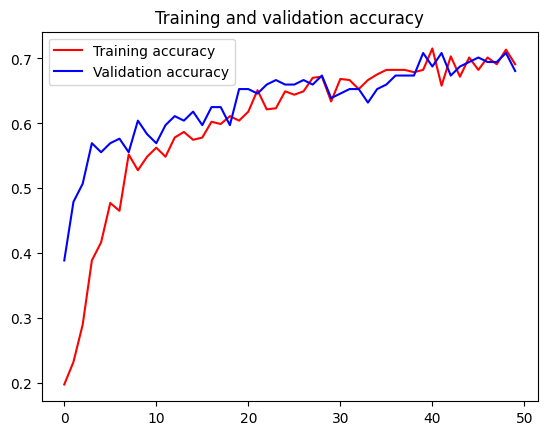

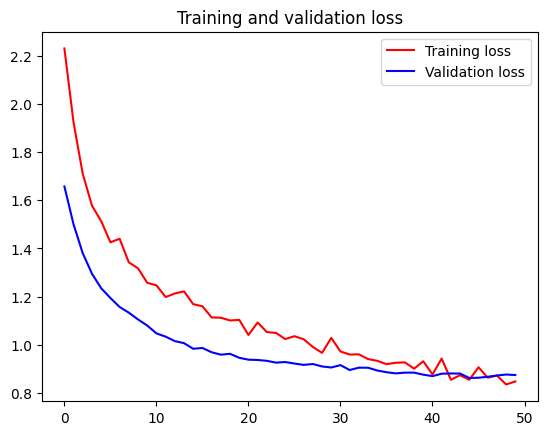

In [17]:
# prompt: bikinkan saya visual accuracy dari mobilenet diatas

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [18]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [19]:
# Prediksi pada data validation
y_pred_probs = model.predict(validation_generator)  # Dapatkan prediksi probabilitas
y_pred = np.argmax(y_pred_probs, axis=1)  # Ubah ke label kelas

# Label sebenarnya dari data validation
y_true = []
for i in range(len(validation_generator)):
    y_true.extend(validation_generator[i][1].argmax(axis=1))  # Ambil label dari generator
y_true = np.array(y_true)

5/5 [==============================] - 5s 785ms/step


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [21]:
def predict_image(image_path, model, class_names):
  """Memprediksi kelas gambar dan menampilkan probabilitas untuk setiap kelas.

  Args:
    image_path: Path ke gambar yang ingin diprediksi.
    model: Model yang telah dilatih.
    class_names: Daftar nama kelas.

  Returns:
    Tuple: Akurasi prediksi (float) dan nama kelas yang diprediksi (str).
  """
  # Periksa apakah path yang diberikan adalah direktori
  if os.path.isdir(image_path):
    # Jika direktori, dapatkan daftar file gambar di dalamnya
    image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

    # Periksa apakah image_files kosong dan tangani kasusnya
    if not image_files:
        print("Tidak ada file gambar yang ditemukan dalam direktori.")
        return None, None  # atau raise exception

    # Pilih file gambar pertama untuk prediksi (atau iterasi melalui semua file)
    image_path = image_files[0]
    print(f"Memprediksi gambar: {image_path}")

  img = image.load_img(image_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  predicted_class_index = np.argmax(preds[0])
  predicted_class_name = class_names[predicted_class_index]
  accuracy = preds[0][predicted_class_index]

  # Menampilkan gambar
  plt.imshow(img)
  plt.title(f"Prediksi: {predicted_class_name}, Akurasi: {accuracy:.4f}")
  plt.axis('off')
  plt.show()

  return accuracy, predicted_class_name

# ... (Kode sebelumnya untuk pelatihan model, dll.) ...

# Penggunaan fungsi predict_image:


1/1 [==============================] - 1s 784ms/step


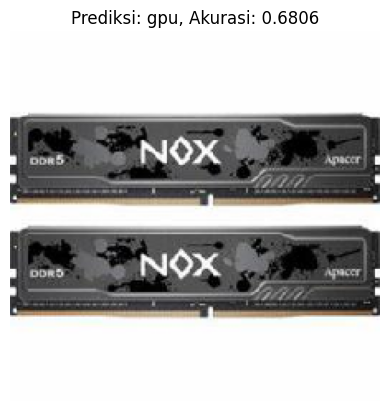

Akurasi prediksi: 0.6806
Kelas yang diprediksi: gpu


In [22]:
class_names = ['case', 'cpu', 'gpu', 'hdd', 'motherboard', 'ram']
accuracy, predicted_class = predict_image('/content/pc_parts/train/ram/100.jpg', model=model, class_names=class_names)
print(f"Akurasi prediksi: {accuracy:.4f}")
print(f"Kelas yang diprediksi: {predicted_class}")

In [23]:
# prompt: save model saya dengan format .h5

model.save('komponenpc_new.h5')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
model.save('/content/drive/MyDrive/komponenpc_new.h5')